In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
from keras.utils import load_img
#from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.12.1


In [3]:
# Create a list with the filepaths for training and testing

#current_dir = os.path.dirname(os.path.abspath(__file__))

#train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
#train_dir = os.path.join(current_dir, '../pages/fruit_image_dataset/train')
train_dir = Path('D:/XuLyAnh/20132213_MidTerm/Final (1)/pages/fruit_image_dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.png'))

In [4]:
#test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
#test_dir = os.path.join(current_dir, '../pages/fruit_image_dataset/test')
test_dir = Path('D:/XuLyAnh/20132213_MidTerm/Final (1)/pages/fruit_image_dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.png'))

In [5]:
#val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
#val_dir = os.path.join(current_dir, '../pages/fruit_image_dataset/validation')
val_dir = Path('D:/XuLyAnh/20132213_MidTerm/Final (1)/pages/fruit_image_dataset/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.png'))

In [6]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 893

Number of different labels: 5

Labels: ['lemon' 'mango' 'kiwi' 'banana' 'apple']


In [9]:
train_df.head(5)

,Filepath,Label
0,D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...,lemon
1,D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...,mango
2,D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...,kiwi
3,D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...,kiwi
4,D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...,kiwi


In [10]:
print(train_df)

                                              Filepath  Label
0    D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  lemon
1    D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  mango
2    D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...   kiwi
3    D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...   kiwi
4    D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...   kiwi
..                                                 ...    ...
888  D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  mango
889  D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  mango
890  D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  apple
891  D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  mango
892  D:\XuLyAnh\20132213_MidTerm\Final (1)\pages\fr...  apple

[893 rows x 2 columns]


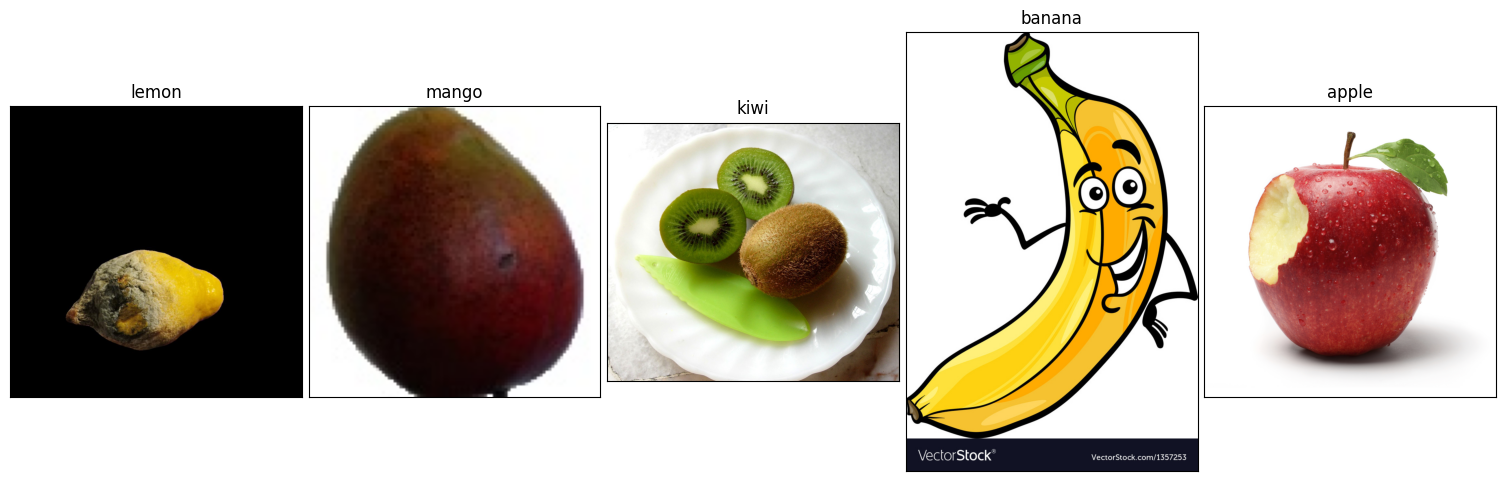

In [11]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 893 validated image filenames belonging to 5 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 198 validated image filenames belonging to 5 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 196 validated image filenames belonging to 5 classes.


In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [17]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

#outputs = tf.keras.layers.Dense(36, activation='softmax')(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
28/28 [==============================] - 16s 485ms/step - loss: 0.3067 - accuracy: 0.9071 - val_loss: 0.0619 - val_accuracy: 0.9899
Epoch 2/5
28/28 [==============================] - 13s 453ms/step - loss: 0.0173 - accuracy: 0.9978 - val_loss: 0.0185 - val_accuracy: 0.9949
Epoch 3/5
28/28 [==============================] - 15s 533ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9949
Epoch 4/5
28/28 [==============================] - 17s 588ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9949
Epoch 5/5
28/28 [==============================] - 16s 565ms/step - loss: 8.5189e-04 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9949


In [18]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

7/7 [==============================] - 4s 391ms/step


['kiwi',
 'banana',
 'kiwi',
 'apple',
 'mango',
 'banana',
 'apple',
 'banana',
 'banana',
 'kiwi',
 'lemon',
 'lemon',
 'apple',
 'banana',
 'lemon',
 'mango',
 'kiwi',
 'apple',
 'mango',
 'mango',
 'lemon',
 'banana',
 'lemon',
 'kiwi',
 'lemon',
 'lemon',
 'apple',
 'banana',
 'banana',
 'mango',
 'apple',
 'lemon',
 'kiwi',
 'banana',
 'apple',
 'banana',
 'kiwi',
 'apple',
 'apple',
 'banana',
 'lemon',
 'banana',
 'lemon',
 'lemon',
 'mango',
 'apple',
 'mango',
 'mango',
 'lemon',
 'mango',
 'mango',
 'mango',
 'kiwi',
 'lemon',
 'mango',
 'mango',
 'apple',
 'kiwi',
 'lemon',
 'banana',
 'lemon',
 'kiwi',
 'lemon',
 'kiwi',
 'mango',
 'mango',
 'mango',
 'apple',
 'kiwi',
 'mango',
 'kiwi',
 'apple',
 'banana',
 'kiwi',
 'mango',
 'apple',
 'banana',
 'mango',
 'lemon',
 'banana',
 'kiwi',
 'kiwi',
 'kiwi',
 'apple',
 'kiwi',
 'mango',
 'lemon',
 'kiwi',
 'mango',
 'mango',
 'kiwi',
 'lemon',
 'kiwi',
 'kiwi',
 'apple',
 'lemon',
 'mango',
 'mango',
 'kiwi',
 'apple',
 'mango

In [19]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [22]:
img = output('D:/XuLyAnh/IMAGE/mango1.jpg')
img

1/1 [==============================] - 0s 40ms/step


'mango'

In [23]:
model.save('20132213_20133120Fruit1.h5')